In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
matplotlib.rcParams.update({'font.size': 20})
import pandas as pd

# COSMOLOGY

In [9]:
def integ_trap(func,z1,z2,N=1000):
    z = np.logspace(np.log10(z1),np.log10(z2),N)
    y = func(z)

    A = 0
    for i in range(len(z)-1):
        A += np.abs((z[i+1]-z[i]))*(y[i]+y[i+1])/2
    return A

def E(z,Om_rad=8.4*10**(-5),Om_lambda=0.7,Om_mat=0.3):
    return np.sqrt(Om_rad*(1+z)**4 + Om_mat*(1+z)**3 + Om_lambda)

def over_E(z):
    return E(z)**(-1)

def comoving_distance(z):
    zero = 10**(-20)
    c = 3e5 #km/s
    H0=100. #km/s/Mpc
    return (c*H0**(-1)*integ_trap(over_E,zero,z,10**(3))) #Mpc h^-1

vec_r = np.vectorize(comoving_distance)

def Luminosity_distance(z):
    '''Returns the Luminosity distance in units of Mpc h^-1'''
    return comoving_distance(z)*(1.+z)

def ABSOLUTE_MAGNITUDE_minus5logh(m,z,K_correction=False,ratio_L=1.):
    if K_correction:
        return m -25. -5.*np.log10(Luminosity_distance(z)) -2.5*np.log10(ratio_L*(1.+z))
    else:
        return m -25. -5.*np.log10(Luminosity_distance(z))

vec_ABSOLUTE_MAGNITUDE_minus5logh = np.vectorize(ABSOLUTE_MAGNITUDE_minus5logh)

# EDGE

In [10]:
def EDGE(x,y,x_min=-26.,x_max=-15.,x_bin_size=0.1,y_min=0.55,y_max=2.1,y_bin_size=0.15,threashold =0.15):
    '''It returns two arrays containing the x and y of the edge'''
    y_Nbins = int((y_max - y_min) / y_bin_size)
    x_Nbins = int((x_max - x_min) / x_bin_size)
    x_edge=[]
    y_edge=[]
    #loop on y bins
    for i in range(y_Nbins):
        # define y bin
        y_low = y_min + y_bin_size * i
        y_high = y_min + y_bin_size * (i+1)
        y_center = (y_low+y_high)/2.
        select_y_in_ybin = np.where((y>=y_low)&(y<y_high))
        # histogram of x in a selected y bin
        x_histo, x_histo_bins = np.histogram(x[select_y_in_ybin],bins=x_Nbins,range=(x_min,x_max))
        #find most populated bin
        x_histo_max = np.max(x_histo[:-1])
        x_histo_max_index = np.argmax(x_histo[:-1])
        #loop to find the edge
        for j in range(x_histo_max_index,0,-1):
            if (x_histo[j]<x_histo_max * threashold):
                edge_index = j
                break
        x_edge.append(x_histo_bins[j])
        y_edge.append(y_center)
    return np.array(x_edge), np.array(y_edge)

# NO AGN feedback

In [11]:
data37 = pd.read_csv('../data/uv37_nofeedback.txt',delimiter=' ') #z = 1.1734
data47 = pd.read_csv('../data/uv47_nofeedback.txt',delimiter=' ') #z = 0.456

u37 = np.array(data37.u37)
v37 = np.array(data37.v37)
uv37 = u37-v37

u47 = np.array(data47.u47)
v47 = np.array(data47.v47)
uv47 = u47-v47


In [12]:
print len(uv37)
print len(u37)

411714
411714


In [13]:
x47_edge,y47_edge = EDGE(u47,uv47,x_min=-22.,x_max=-12,y_min=0.2,y_max=2.2,y_bin_size=0.06,threashold=0.15)
x37_edge,y37_edge = EDGE(u37,uv37,x_min=-22.,x_max=-12,y_min=0.2,y_max=2.2,y_bin_size=0.06,threashold=0.15)

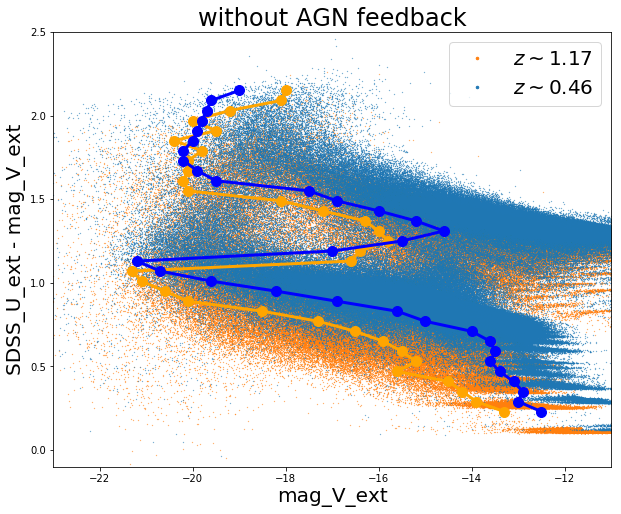

In [15]:
plt.figure(figsize=(10,8))

#points
plt.plot(u37,uv37,".",markersize=0.5,label=r'$z\sim1.17$',c='C1')
plt.plot(u47,uv47,".",markersize=0.5,label=r'$z\sim0.46$',c='C0')

#edges
plt.plot(x37_edge,y37_edge,".",markersize=20,c='orange')
plt.plot(x37_edge,y37_edge,"-",lw=3,c='orange')
plt.plot(x47_edge,y47_edge,".",markersize=20,c='blue')
plt.plot(x47_edge,y47_edge,"-",lw=3,c='blue')

#labels
plt.xlabel("mag_V_ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.legend(markerscale=10)

#limits
#plt.xlim(-24.5,-16.5)
plt.xlim(-23,-11.)
plt.ylim(-0.1,2.5)
plt.title('without AGN feedback')
#plt.savefig("../plots/010/col_mag_all_37_47_nofeedback.png")
plt.show()

In [16]:
print(len(uv37))

411714


# Plot WITH AGN FEEDBACK

In [17]:
data37_f = pd.read_csv('../data/uv37_feedback.txt',delimiter=' ') #z = 1.1734
data47_f = pd.read_csv('../data/uv47_feedback.txt',delimiter=' ') #z = 0.456

u37_f = np.array(data37_f.u37)
v37_f = np.array(data37_f.v37)
uv37_f = u37_f-v37_f

u47_f = np.array(data47_f.u47)
v47_f = np.array(data47_f.v47)
uv47_f = u47_f-v47_f


In [18]:
x47_edge_f,y47_edge_f = EDGE(u47_f,uv47_f,x_min=-22.,x_max=-12,y_min=0.2,y_max=2.2,y_bin_size=0.06,threashold=0.15)
x37_edge_f,y37_edge_f = EDGE(u37_f,uv37_f,x_min=-22.,x_max=-12,y_min=0.2,y_max=2.2,y_bin_size=0.06,threashold=0.15)

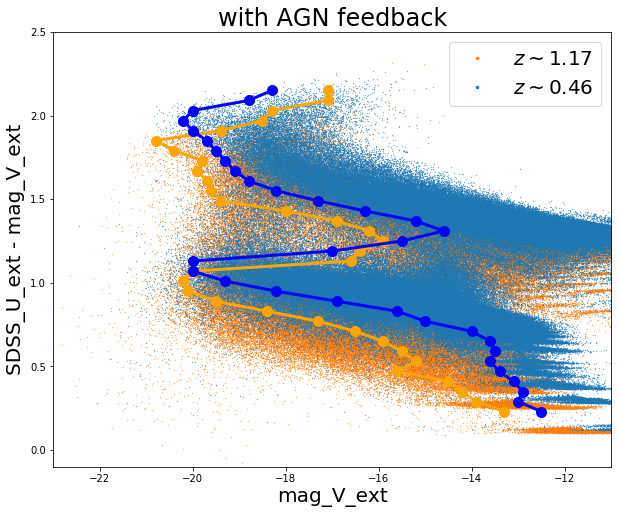

In [19]:
plt.figure(figsize=(10,8))

#points
plt.plot(u37_f,uv37_f,".",markersize=0.5,label=r'$z\sim1.17$',c='C1')
plt.plot(u47_f,uv47_f,".",markersize=0.5,label=r'$z\sim0.46$',c='C0')

#edges
plt.plot(x37_edge_f,y37_edge_f,".",markersize=20,c='orange')
plt.plot(x37_edge_f,y37_edge_f,"-",lw=3,c='orange')
plt.plot(x47_edge_f,y47_edge_f,".",markersize=20,c='blue')
plt.plot(x47_edge_f,y47_edge_f,"-",lw=3,c='blue')

#labels
plt.xlabel("mag_V_ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.legend(markerscale=10)

#limits
#plt.xlim(-24.5,-16.5)
plt.xlim(-23.,-11)
plt.ylim(-0.1,2.5)

plt.title('with AGN feedback')

#plt.savefig("../plots/010/col_mag_all_37_47_feedback.png")
plt.show()

In [20]:
 print(len(uv37_f))

411714


# NO AGN:  Add magnitude cut i<22.5

In [21]:
d37 = pd.read_csv('../data/uvi37_nofeedback.txt',delimiter=' ') #z = 1.1734
d47 = pd.read_csv('../data/uvi47_nofeedback.txt',delimiter=' ') #z = 0.456

u37_ = np.array(d37.u37)
v37_ = np.array(d37.v37)
uv37_ = u37_-v37_
i37_obs = np.array(d37.i37)

u47_ = np.array(d47.u47)
v47_ = np.array(d47.v47)
uv47_ = u47_-v47_
i47_obs = np.array(d47.i47)

CUT_225_47 = np.where(i47_obs<ABSOLUTE_MAGNITUDE_minus5logh(22.5,0.456))
CUT_225_37 = np.where(i37_obs<ABSOLUTE_MAGNITUDE_minus5logh(22.5,1.1734))

u47_ = u47_[CUT_225_47]
v47_ = v47_[CUT_225_47]
uv47_ =uv47_[CUT_225_47]

u37_ = u37_[CUT_225_37]
v37_ = v37_[CUT_225_37]
uv37_ =uv37_[CUT_225_37]




In [22]:
x47_edge_,y47_edge_ = EDGE(u47_,uv47_,x_min=-24.,x_max=-12,y_min=0.55,y_max=2.2,y_bin_size=0.06,threashold=0.15)
x37_edge_,y37_edge_ = EDGE(u37_,uv37_,x_min=-24.,x_max=-12,y_min=0.2,y_max=2.2,y_bin_size=0.08,threashold=0.15)

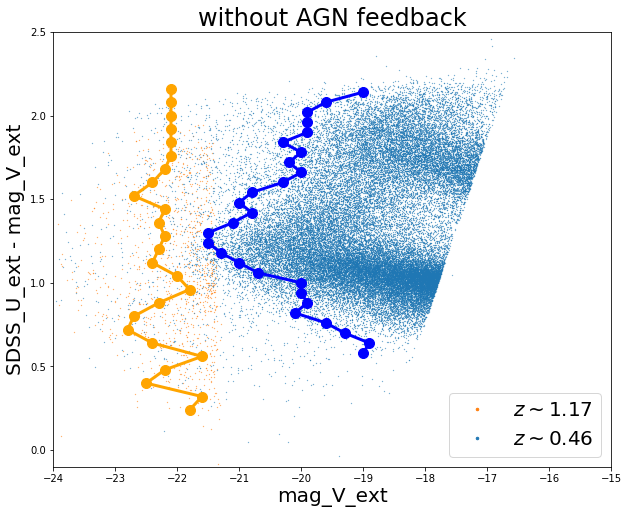

In [23]:
plt.figure(figsize=(10,8))

#points
plt.plot(u37_,uv37_,".",markersize=0.5,label=r'$z\sim1.17$',c='C1')
plt.plot(u47_,uv47_,".",markersize=0.5,label=r'$z\sim0.46$',c='C0')

#edges
plt.plot(x37_edge_,y37_edge_,".",markersize=20,c='orange')
plt.plot(x37_edge_,y37_edge_,"-",lw=3,c='orange')
plt.plot(x47_edge_,y47_edge_,".",markersize=20,c='blue')
plt.plot(x47_edge_,y47_edge_,"-",lw=3,c='blue')

#labels
plt.xlabel("mag_V_ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.legend(markerscale=10)

#limits
#plt.xlim(-24.5,-16.5)
plt.xlim(-24,-15.)
plt.ylim(-0.1,2.5)
plt.title('without AGN feedback')
#plt.savefig("../plots/010/col_mag_all_37_47_nofeedback_cut.png")
plt.show()

In [24]:
print(ABSOLUTE_MAGNITUDE_minus5logh(22.5,0.456))
print(ABSOLUTE_MAGNITUDE_minus5logh(22.5,1.1734))

-18.748803211925992
-21.256565734819656


# WITH AGN:  Add magnitude cut i<22.5

In [25]:
d37_f = pd.read_csv('../data/uvi37_feedback.txt',delimiter=' ') #z = 1.1734
d47_f = pd.read_csv('../data/uvi47_feedback.txt',delimiter=' ') #z = 0.456

u37_f_ = np.array(d37_f.u37)
v37_f_ = np.array(d37_f.v37)
uv37_f_ = u37_f_-v37_f_
i37_obs_f_ = np.array(d37_f.i37)

u47_f_ = np.array(d47_f.u47)
v47_f_ = np.array(d47_f.v47)
uv47_f_ = u47_f_-v47_f_
i47_obs_f_ = np.array(d47_f.i47)

CUT_225_47_f_ = np.where(i47_obs_f_<ABSOLUTE_MAGNITUDE_minus5logh(22.5,0.456))
CUT_225_37_f_ = np.where(i37_obs_f_<ABSOLUTE_MAGNITUDE_minus5logh(22.5,1.1734))

u47_f_ = u47_f_[CUT_225_47_f_]
v47_f_ = v47_f_[CUT_225_47_f_]
uv47_f_ =uv47_f_[CUT_225_47_f_]

u37_f_ = u37_f_[CUT_225_37_f_]
v37_f_ = v37_f_[CUT_225_37_f_]
uv37_f_ =uv37_f_[CUT_225_37_f_]


In [26]:
x47_edge_f_,y47_edge_f_ = EDGE(u47_f_,uv47_f_,x_min=-24.,x_max=-12,y_min=0.6,y_max=2.2,y_bin_size=0.09,threashold=0.15)
x37_edge_f_,y37_edge_f_ = EDGE(u37_f_,uv37_f_,x_min=-24.,x_max=-12,y_min=0.6,y_max=2.2,y_bin_size=0.09,threashold=0.15)

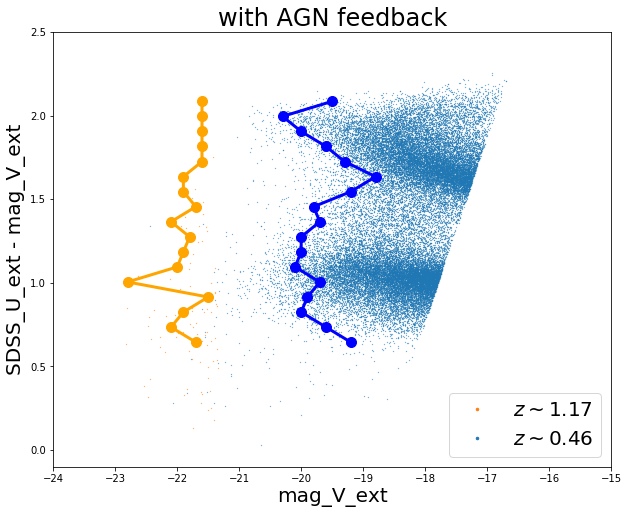

In [27]:
plt.figure(figsize=(10,8))

#points
plt.plot(u37_f_,uv37_f_,".",markersize=0.5,label=r'$z\sim1.17$',c='C1')
plt.plot(u47_f_,uv47_f_,".",markersize=0.5,label=r'$z\sim0.46$',c='C0')

#edges
plt.plot(x37_edge_f_,y37_edge_f_,".",markersize=20,c='orange')
plt.plot(x37_edge_f_,y37_edge_f_,"-",lw=3,c='orange')
plt.plot(x47_edge_f_,y47_edge_f_,".",markersize=20,c='blue')
plt.plot(x47_edge_f_,y47_edge_f_,"-",lw=3,c='blue')

#labels
plt.xlabel("mag_V_ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.legend(markerscale=10)

#limits
#plt.xlim(-24.5,-16.5)
plt.xlim(-24,-15.)
plt.ylim(-0.1,2.5)
plt.title('with AGN feedback')
#plt.savefig("../plots/010/col_mag_all_37_47_feedback_cut.png")
plt.show()

#  VOLUME 9: NO FEEDBACK

In [28]:
d37_9 = pd.read_csv('../data/uvi37_nofeedback_vol9.txt',delimiter=' ') #z = 1.1734
d47_9 = pd.read_csv('../data/uvi47_nofeedback_vol9.txt',delimiter=' ') #z = 0.456

u37_9 = np.array(d37_9.u37)
v37_9 = np.array(d37_9.v37)
uv37_9 = u37_9-v37_9
i37_obs_9 = np.array(d37.i37)

u47_9 = np.array(d47_9.u47)
v47_9 = np.array(d47_9.v47)
uv47_9 = u47_9-v47_9
i47_obs_9 = np.array(d47_9.i47)

CUT_225_47_9 = np.where(i47_obs_9<ABSOLUTE_MAGNITUDE_minus5logh(22.5,0.456))
CUT_225_37_9 = np.where(i37_obs_9<ABSOLUTE_MAGNITUDE_minus5logh(22.5,1.1734))

u47_9 = u47_9[CUT_225_47_9]
v47_9 = v47_9[CUT_225_47_9]
uv47_9 =uv47_9[CUT_225_47_9]

u37_9 = u37_9[CUT_225_37_9]
v37_9 = v37_9[CUT_225_37_9]
uv37_9 =uv37_9[CUT_225_37_9]


In [29]:
x47_edge_9,y47_edge_9 = EDGE(u47_9,uv47_9,x_min=-27.,x_max=-8,y_min=0.6,y_max=2.2,y_bin_size=0.09,threashold=0.15)
x37_edge_9,y37_edge_9 = EDGE(u37_9,uv37_9,x_min=-27.,x_max=-8,y_min=0.6,y_max=2.2,y_bin_size=0.09,threashold=0.15)

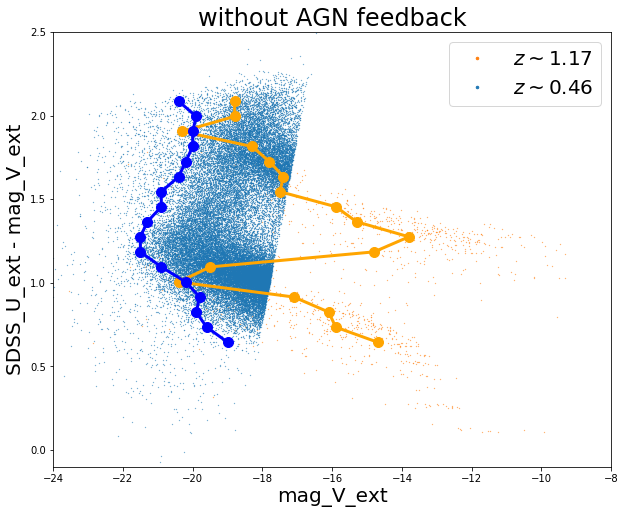

In [30]:
plt.figure(figsize=(10,8))

#points
plt.plot(u37_9,uv37_9,".",markersize=0.5,label=r'$z\sim1.17$',c='C1')
plt.plot(u47_9,uv47_9,".",markersize=0.5,label=r'$z\sim0.46$',c='C0')

#edges
plt.plot(x37_edge_9,y37_edge_9,".",markersize=20,c='orange')
plt.plot(x37_edge_9,y37_edge_9,"-",lw=3,c='orange')
plt.plot(x47_edge_9,y47_edge_9,".",markersize=20,c='blue')
plt.plot(x47_edge_9,y47_edge_9,"-",lw=3,c='blue')

#labels
plt.xlabel("mag_V_ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.legend(markerscale=10)

#limits
#plt.xlim(-24.5,-16.5)
plt.xlim(-24,-8.)
plt.ylim(-0.1,2.5)
plt.title('without AGN feedback')
#plt.savefig("../plots/010/col_mag_all_37_47_nofeedback_cut_vol9.png")
plt.show()

#  VOLUME 9: WITH FEEDBACK

In [31]:
d37_9_f = pd.read_csv('../data/uvi37_feedback_vol9.txt',delimiter=' ') #z = 1.1734
d47_9_f = pd.read_csv('../data/uvi47_feedback_vol9.txt',delimiter=' ') #z = 0.456

u37_9_f = np.array(d37_9_f.u37)
v37_9_f = np.array(d37_9_f.v37)
uv37_9_f = u37_9_f-v37_9_f
i37_obs_9_f = np.array(d37_f.i37)

u47_9_f = np.array(d47_9_f.u47)
v47_9_f = np.array(d47_9_f.v47)
uv47_9_f = u47_9_f-v47_9_f
i47_obs_9_f = np.array(d47_9_f.i47)

CUT_225_47_9_f = np.where(i47_obs_9_f<ABSOLUTE_MAGNITUDE_minus5logh(22.5,0.456))
CUT_225_37_9_f = np.where(i37_obs_9_f<ABSOLUTE_MAGNITUDE_minus5logh(22.5,1.1734))

u47_9_f = u47_9_f[CUT_225_47_9_f]
v47_9_f = v47_9_f[CUT_225_47_9_f]
uv47_9_f =uv47_9_f[CUT_225_47_9_f]

u37_9_f = u37_9_f[CUT_225_37_9_f]
v37_9_f = v37_9_f[CUT_225_37_9_f]
uv37_9_f =uv37_9_f[CUT_225_37_9_f]


In [32]:
x47_edge_9_f,y47_edge_9_f = EDGE(u47_9_f,uv47_9_f,x_min=-27.,x_max=-8,y_min=0.6,y_max=2.2,y_bin_size=0.09,threashold=0.15)
x37_edge_9_f,y37_edge_9_f = EDGE(u37_9_f,uv37_9_f,x_min=-27.,x_max=-8,y_min=0.6,y_max=2.2,y_bin_size=0.09,threashold=0.15)

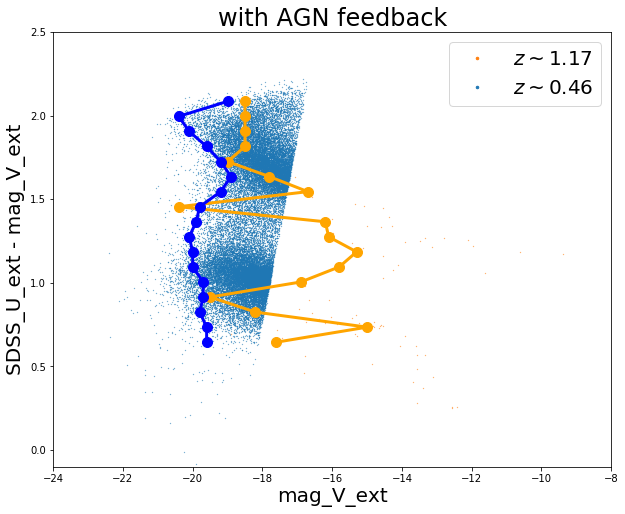

In [33]:
plt.figure(figsize=(10,8))

#points
plt.plot(u37_9_f,uv37_9_f,".",markersize=0.5,label=r'$z\sim1.17$',c='C1')
plt.plot(u47_9_f,uv47_9_f,".",markersize=0.5,label=r'$z\sim0.46$',c='C0')

#edges
plt.plot(x37_edge_9_f,y37_edge_9_f,".",markersize=20,c='orange')
plt.plot(x37_edge_9_f,y37_edge_9_f,"-",lw=3,c='orange')
plt.plot(x47_edge_9_f,y47_edge_9_f,".",markersize=20,c='blue')
plt.plot(x47_edge_9_f,y47_edge_9_f,"-",lw=3,c='blue')

#labels
plt.xlabel("mag_V_ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.legend(markerscale=10)

#limits
#plt.xlim(-24.5,-16.5)
plt.xlim(-24,-8.)
plt.ylim(-0.1,2.5)
plt.title('with AGN feedback')
#plt.savefig("../plots/010/col_mag_all_37_47_feedback_cut_vol9.png")
plt.show()

In [63]:
def read_uvi(feedback=True, volume=0,snap=37):
    
        #create right path
        if feedback: fb = 'feedback' 
        else: fb = 'nofeedback'    
        path= '../data/uvi'+str(snap)+'_'+fb+'_vol'+str(volume)+'.txt'
        print path
        
        #read data
        data = pd.read_csv(path,delimiter=' ')
        
        
        u = np.array(data.u)
        v = np.array(data.v)
        uv = u-v
        i_obs = np.array(data.i)
        
        return u,v,uv,i_obs


        
        
        

In [78]:
x,y,z,j = read_uvi(feedback=True,volume=0,snap=47)
x1,y1,z1,j1 = read_uvi(feedback=True,volume=0,snap=37)

../data/uvi47_feedback_vol0.txt
../data/uvi37_feedback_vol0.txt


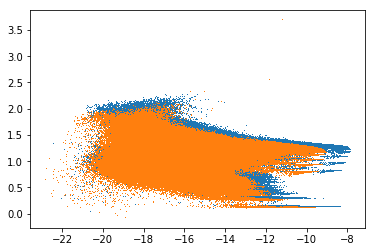

In [79]:
plt.plot(x,z,",")
plt.plot(x1,z1,",")
plt.show()